In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Input
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn import metrics

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import io
import os

from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from keras import regularizers
import time
import time

from keras import regularizers
from scipy import stats
import seaborn as sns
import pickle
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau

from keras.models import Model, load_model

from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#chargement des donnees 

df = pd.read_csv('/home/kodzo.apedo/Bureau/Visu/mesdonnees/mesdonnees_sans_degradation.csv')

In [3]:
ds = df.values

In [4]:
RANDOM_SEED = 42 #used to help randomly select the data points
TEST_PCT = 0.30 

In [5]:
X = ds[:,0:34].astype(float)
Y = ds[:,34]

In [6]:
#Encodons la classe "Classe"

encoder = LabelEncoder()
encoder.fit(Y)
encoder_Y = encoder.transform(Y)

In [7]:
encoder_Y

array([ 1,  1,  1, ..., 15, 15, 15])

In [8]:
# Redefinissons nos classe

dummy_y = np_utils.to_categorical(encoder_Y)

In [9]:
Yd = dummy_y

In [10]:
X_train, X_test, Yd_train, Yd_test = train_test_split(X, Yd, test_size = TEST_PCT, random_state = RANDOM_SEED)

In [11]:
nb_class = 16 # Nombre de classe

nb_epoch = 500

batch_size = 1000

#Couche d'entrée

input_dim = X_train.shape[1] #numbre de colonne, 

encoding_dim = 500 # Dimension d'encodage
nb_class = 20 # Nombre de classe
hidden_dim = encoding_dim - 200 #i.e. 7

hidden_dim2 = hidden_dim - 200

#hidden_dim3 = hidden_dim + 30

learning_rate = 1e-7

In [12]:

#Debut du decompte du temps
start_time = time.time()

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation='tanh', 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation='tanh')(encoder)
#encoder = Dense(hidden_dim2, activation='tanh')(encoder)
encoder = Dense(input_dim, activation='relu')(encoder)


print("Temps d execution : %s secondes ---" %(time.time() - start_time))


Temps d execution : 0.054860591888427734 secondes ---


In [13]:

autoencoder = Model(inputs=input_layer, outputs=encoder)


autoencoder.summary()

autoencoder.compile(metrics=['accuracy'],
                    loss='mse',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="ENCODER_DEGRAD.h5",
                               save_best_only=True,
                               verbose=0)



history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test), callbacks = [cp]).history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 34)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               17500     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 34)                10234     
Total params: 178,034
Trainable params: 178,034
Non-trainable params: 0
_________________________________________________________________
Train on 223988 samples, validate on 95996 samples
Epoch 1/500
223988/223988 [==============================] - 10s 47us/step - loss: 0.5248 - acc: 0.8296 - val_loss: 0.2549 - val_acc: 0.9129
Epoch 2/500
223988/223988 [==============================] - 10s 44us/step -

223988/223988 [==============================] - 9s 41us/step - loss: 0.1706 - acc: 0.9046 - val_loss: 0.1777 - val_acc: 0.8852
Epoch 53/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1720 - acc: 0.9106 - val_loss: 0.1690 - val_acc: 0.9284
Epoch 54/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1710 - acc: 0.9018 - val_loss: 0.1697 - val_acc: 0.9253
Epoch 55/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1711 - acc: 0.9027 - val_loss: 0.1843 - val_acc: 0.7935
Epoch 56/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1731 - acc: 0.8846 - val_loss: 0.1711 - val_acc: 0.8941
Epoch 57/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1701 - acc: 0.9121 - val_loss: 0.1698 - val_acc: 0.8829
Epoch 58/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1751 - acc: 0.8944 - val_loss: 0.1763 - val_acc: 0.8980
Epoch 59/500
223988/223988

223988/223988 [==============================] - 9s 40us/step - loss: 0.1711 - acc: 0.9088 - val_loss: 0.1694 - val_acc: 0.9169
Epoch 111/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1701 - acc: 0.9184 - val_loss: 0.1708 - val_acc: 0.9114
Epoch 112/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1716 - acc: 0.9076 - val_loss: 0.1698 - val_acc: 0.9202
Epoch 113/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1716 - acc: 0.9030 - val_loss: 0.1693 - val_acc: 0.9149
Epoch 114/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1694 - acc: 0.9174 - val_loss: 0.1691 - val_acc: 0.9049
Epoch 115/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1699 - acc: 0.9048 - val_loss: 0.1689 - val_acc: 0.8910
Epoch 116/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1687 - acc: 0.9242 - val_loss: 0.1719 - val_acc: 0.9300
Epoch 117/500
223988

Epoch 168/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1718 - acc: 0.8857 - val_loss: 0.1696 - val_acc: 0.8802
Epoch 169/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1737 - acc: 0.8873 - val_loss: 0.1802 - val_acc: 0.8229
Epoch 170/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1701 - acc: 0.9112 - val_loss: 0.1706 - val_acc: 0.8612
Epoch 171/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1708 - acc: 0.8995 - val_loss: 0.1689 - val_acc: 0.9259
Epoch 172/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1700 - acc: 0.9086 - val_loss: 0.1735 - val_acc: 0.8912
Epoch 173/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1716 - acc: 0.8813 - val_loss: 0.1691 - val_acc: 0.9005
Epoch 174/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1700 - acc: 0.9012 - val_loss: 0.1689 - val_acc: 0.8913
Epoch 

223988/223988 [==============================] - 9s 40us/step - loss: 0.1688 - acc: 0.9277 - val_loss: 0.1704 - val_acc: 0.9105
Epoch 226/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1699 - acc: 0.9135 - val_loss: 0.1721 - val_acc: 0.9069
Epoch 227/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1723 - acc: 0.9030 - val_loss: 0.1695 - val_acc: 0.9216
Epoch 228/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1703 - acc: 0.9019 - val_loss: 0.1704 - val_acc: 0.8976
Epoch 229/500
223988/223988 [==============================] - 9s 39us/step - loss: 0.1695 - acc: 0.9093 - val_loss: 0.1689 - val_acc: 0.9256
Epoch 230/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1691 - acc: 0.9131 - val_loss: 0.1688 - val_acc: 0.9174
Epoch 231/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1697 - acc: 0.9145 - val_loss: 0.1748 - val_acc: 0.8849
Epoch 232/500
223988

Epoch 283/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1710 - acc: 0.9113 - val_loss: 0.1703 - val_acc: 0.9196
Epoch 284/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1699 - acc: 0.9194 - val_loss: 0.1698 - val_acc: 0.9216
Epoch 285/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1702 - acc: 0.9155 - val_loss: 0.1695 - val_acc: 0.9210
Epoch 286/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1721 - acc: 0.9079 - val_loss: 0.1697 - val_acc: 0.9212
Epoch 287/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1705 - acc: 0.9117 - val_loss: 0.1699 - val_acc: 0.9096
Epoch 288/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1697 - acc: 0.9155 - val_loss: 0.1718 - val_acc: 0.8865
Epoch 289/500
223988/223988 [==============================] - 9s 39us/step - loss: 0.1696 - acc: 0.9103 - val_loss: 0.1720 - val_acc: 0.9085
Epoch 

223988/223988 [==============================] - 9s 40us/step - loss: 0.1718 - acc: 0.8967 - val_loss: 0.1691 - val_acc: 0.9248
Epoch 341/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1713 - acc: 0.8918 - val_loss: 0.1713 - val_acc: 0.8965
Epoch 342/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1783 - acc: 0.8332 - val_loss: 0.1745 - val_acc: 0.8865
Epoch 343/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1729 - acc: 0.8982 - val_loss: 0.1717 - val_acc: 0.9041
Epoch 344/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1704 - acc: 0.9144 - val_loss: 0.1697 - val_acc: 0.9137
Epoch 345/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1701 - acc: 0.9165 - val_loss: 0.1703 - val_acc: 0.9030
Epoch 346/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1707 - acc: 0.9045 - val_loss: 0.1692 - val_acc: 0.9233
Epoch 347/500
223988

Epoch 398/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1703 - acc: 0.9030 - val_loss: 0.1686 - val_acc: 0.9304
Epoch 399/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1714 - acc: 0.8929 - val_loss: 0.1708 - val_acc: 0.8891
Epoch 400/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1696 - acc: 0.9052 - val_loss: 0.1685 - val_acc: 0.9241
Epoch 401/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1693 - acc: 0.9142 - val_loss: 0.1717 - val_acc: 0.8917
Epoch 402/500
223988/223988 [==============================] - 9s 40us/step - loss: 0.1706 - acc: 0.8937 - val_loss: 0.1691 - val_acc: 0.9090
Epoch 403/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1691 - acc: 0.9186 - val_loss: 0.1697 - val_acc: 0.9248
Epoch 404/500
223988/223988 [==============================] - 9s 41us/step - loss: 0.1711 - acc: 0.8854 - val_loss: 0.1709 - val_acc: 0.8710
Epoch 

223988/223988 [==============================] - 5s 22us/step - loss: 0.1749 - acc: 0.8720 - val_loss: 0.1726 - val_acc: 0.8903
Epoch 456/500
223988/223988 [==============================] - 5s 22us/step - loss: 0.1714 - acc: 0.9096 - val_loss: 0.1707 - val_acc: 0.9173
Epoch 457/500
223988/223988 [==============================] - 5s 22us/step - loss: 0.1711 - acc: 0.9180 - val_loss: 0.1699 - val_acc: 0.9132
Epoch 458/500
223988/223988 [==============================] - 5s 22us/step - loss: 0.1697 - acc: 0.9260 - val_loss: 0.1689 - val_acc: 0.9333
Epoch 459/500
223988/223988 [==============================] - 5s 22us/step - loss: 0.1717 - acc: 0.9174 - val_loss: 0.1694 - val_acc: 0.9248
Epoch 460/500
223988/223988 [==============================] - 5s 22us/step - loss: 0.1711 - acc: 0.9112 - val_loss: 0.1717 - val_acc: 0.9054
Epoch 461/500
223988/223988 [==============================] - 5s 22us/step - loss: 0.1694 - acc: 0.9225 - val_loss: 0.1693 - val_acc: 0.9343
Epoch 462/500
223988

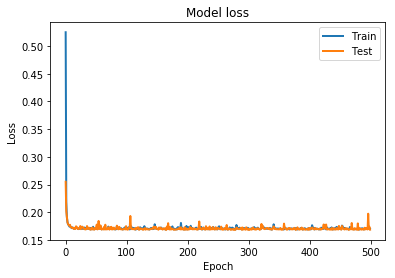

In [14]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

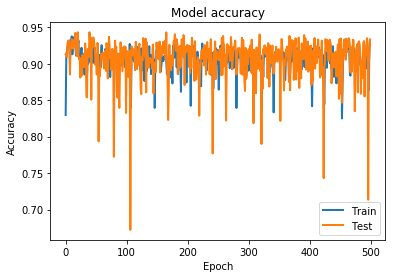

In [15]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [16]:
#Debut du decompte du temps
start_time = time.time()

model = Sequential()

model.add(autoencoder)
#model.add(Dropout(0.5))
model.add(Dense(500, activation ='relu'))
#model.add(Dropout(0.1))
model.add(Dense(300, activation ='tanh'))
#model.add(Dropout(0.1))
model.add(Dense(100, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(nb_class, activation ='sigmoid'))


model.compile(metrics=['accuracy'], loss = 'mse', 
              optimizer='adam')

model.summary()


checkpointer = ModelCheckpoint(filepath='DEGRADATION.h5', 
                               verbose=2, save_best_only=True)



history = model.fit(X_train, Yd_train,
             validation_data=(X_test, Yd_test),
             epochs= nb_epoch,
             batch_size=batch_size,
             shuffle=True,
             verbose=2, callbacks=[checkpointer]).history


score, acc = model.evaluate(X_test, y = Yd_test, 
               batch_size = batch_size, 
               verbose = 1)




print("Temps d execution : %s secondes ---" %(time.time() - start_time))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 34)                178034    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               17500     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                2020      
Total params: 377,954
Trainable params: 377,954
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected dense_7 to have shape (20,) but got array with shape (16,)

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()